# Importing Librarys


In [36]:
import pandas as pd
import seaborn as sns

# Importing Database

In [37]:
tips = pd.read_csv('tips.csv')

# Analysis I - Bill x Tips

In [38]:
tips.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

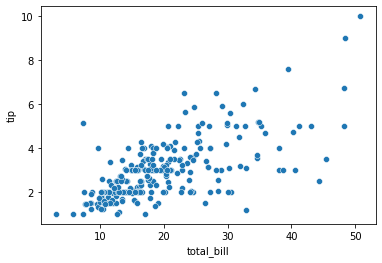

In [39]:
tip_value = sns.scatterplot(x = 'total_bill', y = 'tip', data = tips)

**NOTE: The tip seems to be directly proportional to the bill**

In [40]:
print('The Database contains {} registers'. format(tips.shape[0]))
print('Non null registers')
tips.count()

The Database contains 244 registers
Non null registers


total_bill    244
tip           244
dessert       244
day           244
time          244
size          244
dtype: int64

## Creating % column

In [41]:
tips.head(1)

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2


In [42]:
tips['%'] = tips.tip / tips.total_bill

In [43]:
tips.head(1)

,total_bill,tip,dessert,day,time,size,%
0,16.99,1.01,No,Sun,Dinner,2,0.059447


In [44]:
tips['%'] = tips['%'].round(2)

In [45]:
tips.head(3)

,total_bill,tip,dessert,day,time,size,%
0,16.99,1.01,No,Sun,Dinner,2,0.06
1,10.34,1.66,No,Sun,Dinner,3,0.16
2,21.01,3.50,No,Sun,Dinner,3,0.17


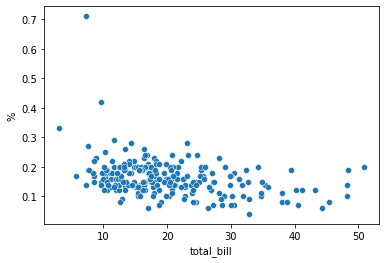

In [46]:
percentage_bill = sns.scatterplot(x = 'total_bill', y = '%', data = tips)

**NOTE: Looking at the figure it's possible to see the bill is not proportional to the tip**

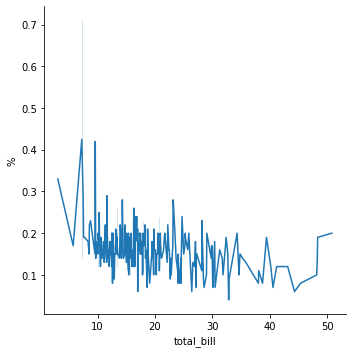

In [47]:
percentage_bill_line = sns.relplot(x = 'total_bill', y = '%', kind = 'line', data = tips)

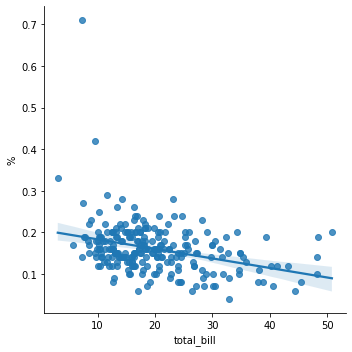

In [48]:
sns.lmplot(x = 'total_bill', y = '%', data = tips)

# Analysis II - Dessert  X  Tip

In [49]:
tips[tips.dessert == 'Yes'].describe()

,total_bill,tip,size,%
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [50]:
tips[tips.dessert == 'No'].describe()

,total_bill,tip,size,%
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


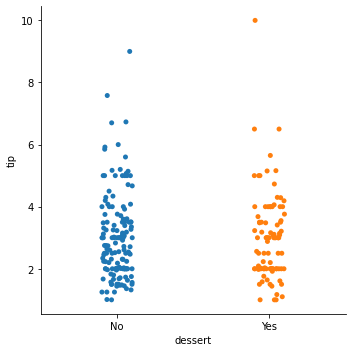

In [51]:
sns.catplot(x = 'dessert', y = 'tip', data = tips)

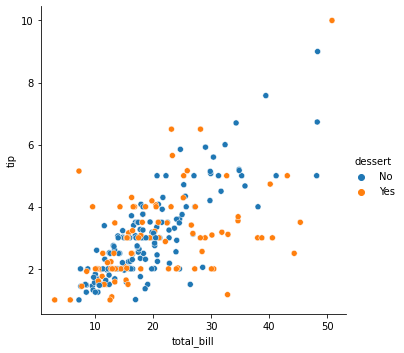

In [53]:
sns.relplot( x = 'total_bill', y = 'tip', hue = 'dessert', data = tips)

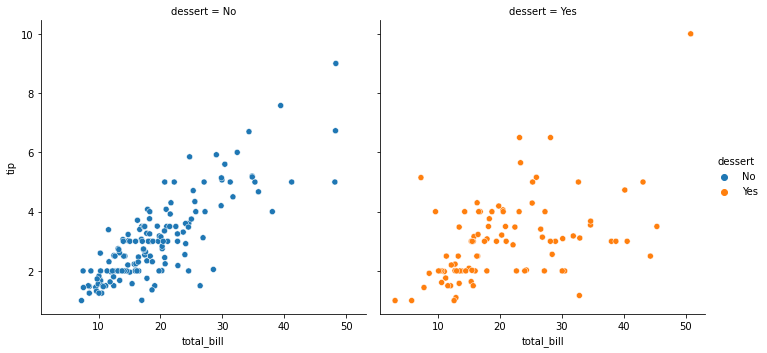

In [56]:
sns.relplot( x = 'total_bill', y = 'tip', hue = 'dessert', col = 'dessert', data = tips)

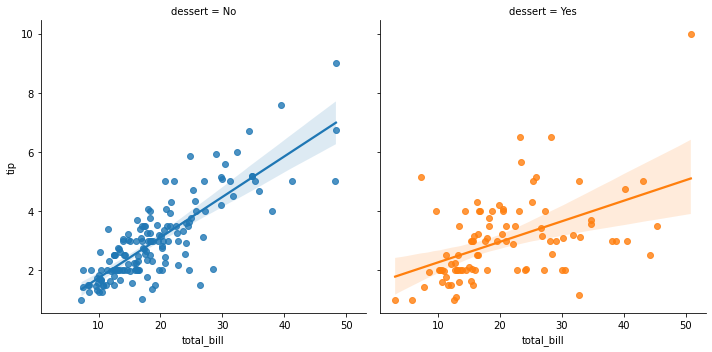

In [57]:
sns.lmplot(x = 'total_bill', y = 'tip', col = 'dessert', hue = 'dessert', data = tips)

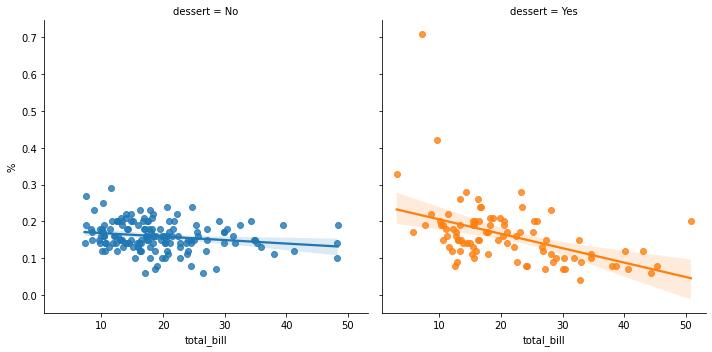

In [58]:
sns.lmplot(x = 'total_bill', y = '%', col = 'dessert', hue = 'dessert', data = tips)

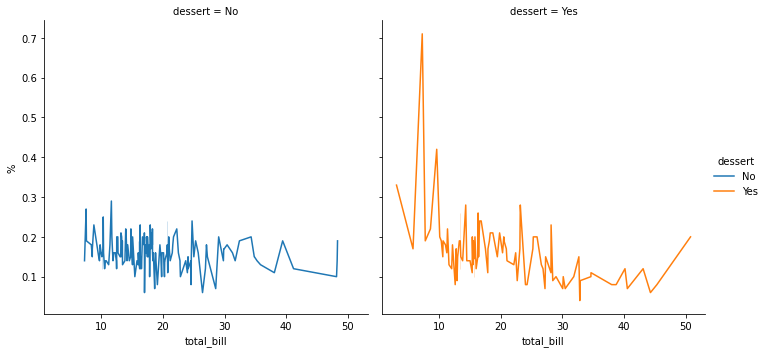

In [61]:
sns.relplot(x = 'total_bill', y = '%', col = 'dessert', hue = 'dessert', kind = 'line', data = tips)

**NOTE: Analyzing the figures we see a difference between the ones who order dessert and the ones who don't**

## Hypothesis Test


**H<sup>null</sup>**
> **The distribution of tips is the same for both groups**

**H<sup>alt</sup>**
> **The distribution of tips is different for both groups**

In [62]:
from scipy.stats import ranksums

In [65]:
dessert = tips.query('dessert == "Yes"')['%']

In [66]:
no_dessert = tips.query('dessert == "No"')['%']

In [69]:
r = ranksums(dessert, no_dessert)

## Hypothesis Result:


In [71]:
print('The value of p-value is {}'.format(r.pvalue))

The value of p-value is 0.5266635660124415


**H<sup>null</sup>**
> **The distribution of tips is the same for both groups**

# Analysis III - Day of Week X Bill

In [72]:
tips.head()

,total_bill,tip,dessert,day,time,size,%
0,16.99,1.01,No,Sun,Dinner,2,0.06
1,10.34,1.66,No,Sun,Dinner,3,0.16
2,21.01,3.50,No,Sun,Dinner,3,0.17
3,23.68,3.31,No,Sun,Dinner,2,0.14
4,24.59,3.61,No,Sun,Dinner,4,0.15


In [73]:
tips.day.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

## Visual Analysis

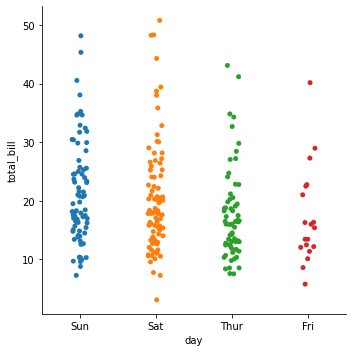

In [74]:
sns.catplot(x = 'day', y = 'total_bill', data = tips)

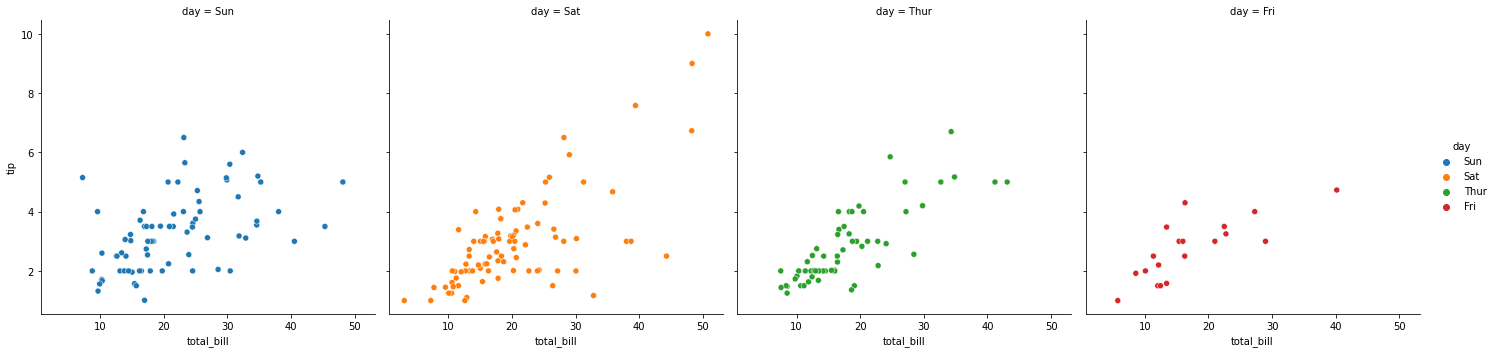

In [79]:
sns.relplot(x = 'total_bill', y = 'tip', hue = 'day', col='day', data = tips)

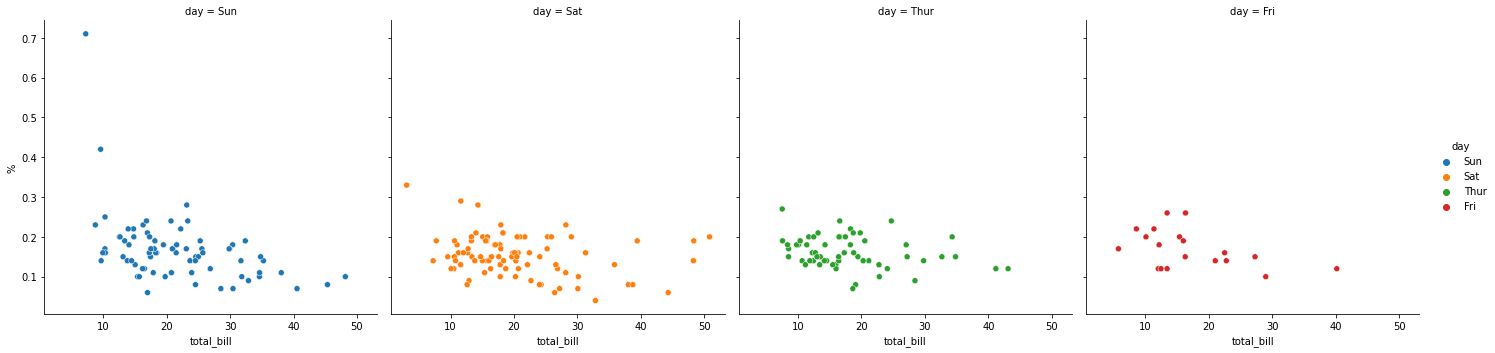

In [80]:
sns.relplot(x = 'total_bill', y = '%', hue = 'day', col = 'day', data = tips)

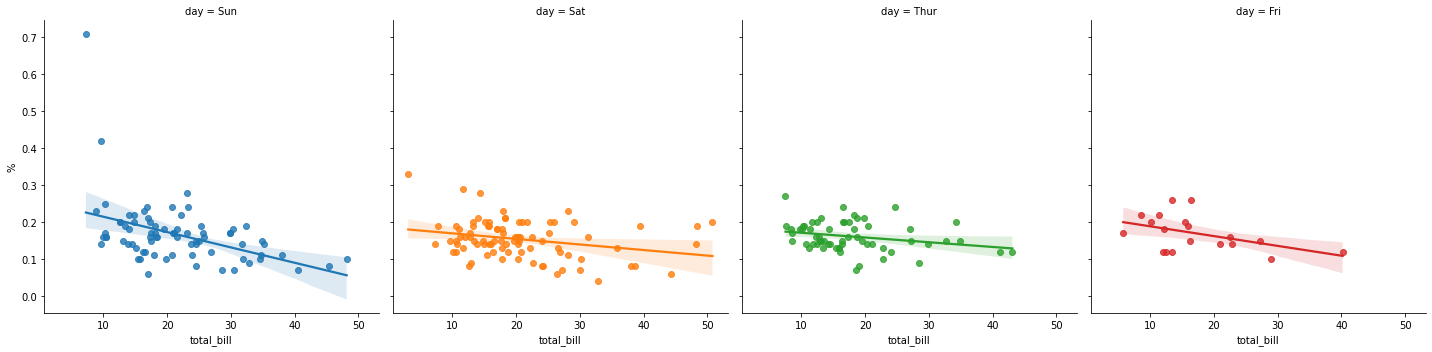

In [81]:
sns.lmplot(x = 'total_bill', y = '%', hue = 'day', col = 'day', data = tips)

## Descriptive Analysis

In [82]:
general_mean_tip = tips.tip.mean()

In [83]:
print("The general mean of tips is: {}".format(general_mean_tip))

The general mean of tips is: 2.9982786885245902


In [85]:
tips.groupby(['day']).mean()[['total_bill', 'tip', '%']]

,total_bill,tip,%
day,,,
Fri,17.151579,2.734737,0.169474
Sat,20.441379,2.993103,0.153678
Sun,21.410000,3.255132,0.166974
Thur,17.682742,2.771452,0.161129


In [87]:
print('DOW Frequency')
tips.day.value_counts()

DOW Frequency


Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

## Hypothesis Test

**H<sup>null</sup>**

> **The distribution of the bill is equal for Sunday and Saturday

**H<sup>alt</sup>**

> **The distribution of the bill is NOT equal for Sunday and Saturday


In [91]:
sat_bill = tips.query('day == "Sat"').total_bill

In [89]:
sun_bill = tips.query('day == "Sun"').total_bill

In [96]:
r2 = ranksums(sun_bill, sat_bill)

## Hypothesis Result

**H<sup>null</sup>**

> **The distribution of the bill is equal for Sunday and Saturday

In [97]:
print('P-Value is {}'.format(r2.pvalue))

P-Value is 0.3576728477868443


# Analysis IV - Time of day (TOD) X Tip

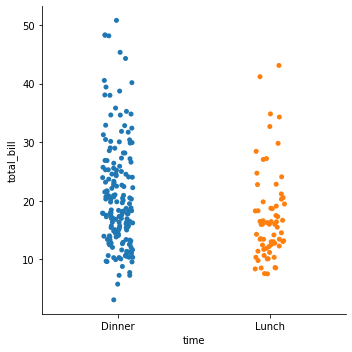

In [98]:
sns.catplot(x = 'time', y = 'total_bill', data = tips)

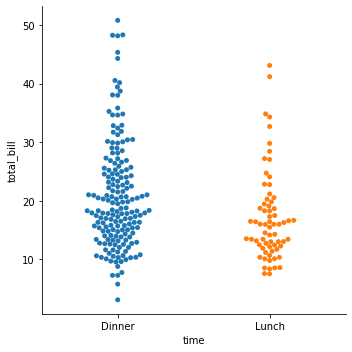

In [101]:
sns.catplot(x = 'time', y = 'total_bill', kind = 'swarm',data = tips)

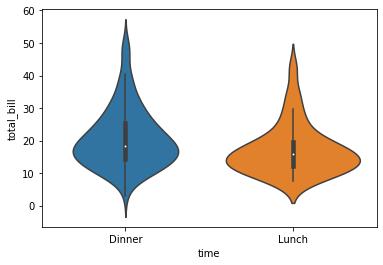

In [102]:
sns.violinplot(x = 'time', y = 'total_bill', data = tips)

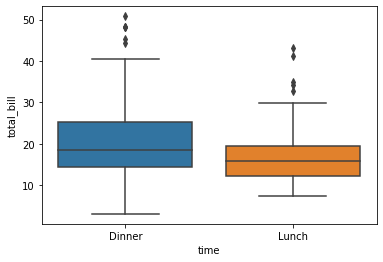

In [103]:
sns.boxplot(x = 'time', y = 'total_bill', data = tips)

In [105]:
lunch = tips.query('time == "Lunch"').total_bill

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


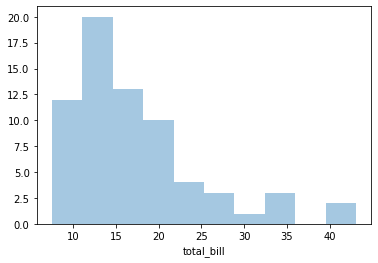

In [107]:
sns.distplot(lunch, kde = False)

In [108]:
dinner = tips.query('time == "Dinner"').total_bill

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


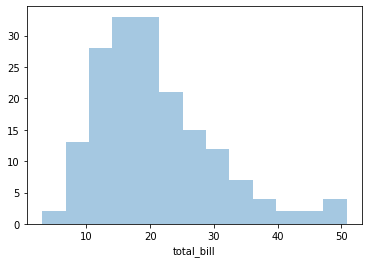

In [111]:
sns.distplot(dinner, kde = False)

## Hypothesis Test

**H<sup>null</sup>**

> **The distribution of bill value is equal to lunch and dinner**

**H<sup>alt</sup>**

> **The distribution of bill value is NOT equal to lunch and dinner**




In [115]:
tips.groupby(['time']).mean()[['total_bill', 'tip', '%']]

,total_bill,tip,%
time,,,
Dinner,20.797159,3.102670,0.159773
Lunch,17.168676,2.728088,0.163971


In [117]:
r3 = ranksums(lunch, dinner)

In [120]:
print('The P-Value is {}'.format(r3.pvalue))

The P-Value is 0.0011791039723641672


## Hypothesis Result


**H<sup>alt</sup>**

> **The distribution of bill value is NOT equal to lunch and dinner**

## Hypothesis Test

**H<sup>null</sup>**

> **The distribution of tips tax value is equal to lunch and dinner**

**H<sup>alt</sup>**

> **The distribution of tips tax value is NOT equal to lunch and dinner**

In [122]:
percentage_lunch = tips.query('time == "Lunch"')['%']

In [123]:
percentage_dinner = tips.query('time == "Dinner"')['%']

In [127]:
r4 = ranksums(percentage_lunch, percentage_dinner)

In [128]:
print("P-Value is: {}".format(r4.pvalue))

P-Value is: 0.2602493995587126


## Hypothesis Result

**H<sup>null</sup>**

> **The distribution of tips tax value is equal to lunch and dinner**